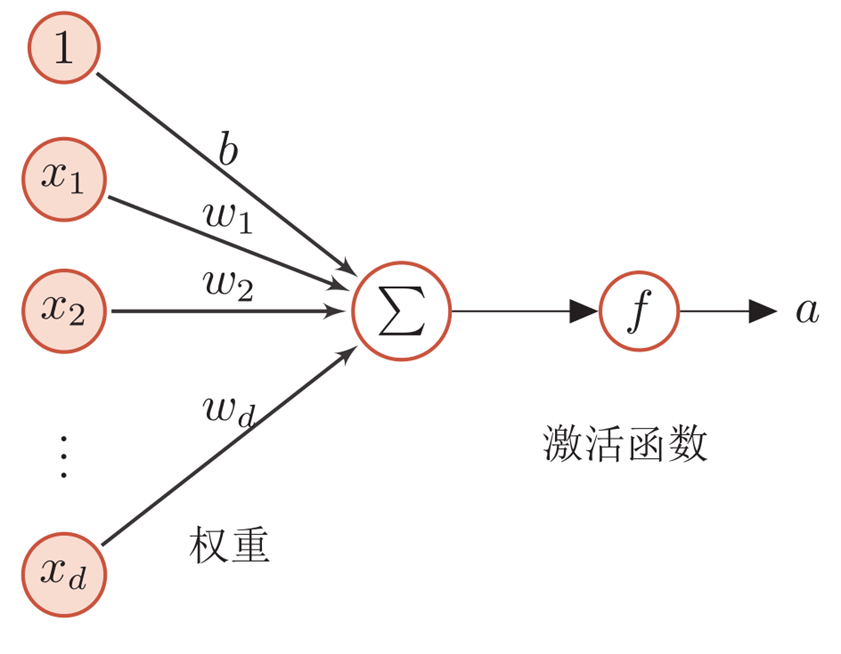

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
import torch.nn as nn

torch.set_printoptions(edgeitems=2, linewidth=75)

In [15]:
x=torch.randn(4)
def model(x, w, b):
    z=w * x + b
    return relu(z)


In [3]:
input_x=torch.randn(4)
input_x

tensor([-0.4581, -0.1604,  0.4683, -1.0239])

In [4]:
# sigmoid激活函数
def sigmoid(Z):
    """
    sigmoid激活函数的向量化实现

    参数：
        Z -- 线性求和的结果

    返回值：
        A -- 激活后的结果
    """
    return  1 / (1 + np.exp(-Z))
sigmoid(input_x)


tensor([0.3874, 0.4600, 0.6150, 0.2643])

In [5]:
torch.sigmoid(input_x)

tensor([0.3874, 0.4600, 0.6150, 0.2643])

In [6]:
def f_relu(z):
    z=np.where(z>0,z,0)
    return  torch.tensor(z)
f_relu(input_x)

tensor([0.0000, 0.0000, 0.4683, 0.0000])

tensor([-3.0000e-01, -2.9000e-01, -2.8000e-01, -2.7000e-01, -2.6000e-01,
        -2.5000e-01, -2.4000e-01, -2.3000e-01, -2.2000e-01, -2.1000e-01,
        -2.0000e-01, -1.9000e-01, -1.8000e-01, -1.7000e-01, -1.6000e-01,
        -1.5000e-01, -1.4000e-01, -1.3000e-01, -1.2000e-01, -1.1000e-01,
        -1.0000e-01, -9.0000e-02, -8.0000e-02, -7.0000e-02, -6.0000e-02,
        -5.0000e-02, -4.0000e-02, -3.0000e-02, -2.0000e-02, -1.0000e-02,
        -2.3842e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8000e+00,  1.9000e+00,
         2.0000e+00,  2.1000e+00,  2.2000e+00,  2.3000e+00,  2.4000e+00,
         2.5000e+00,  2.6000e+00,  2.7000e+00,  2.8000e+00,  2.9000e+00,
         3.0000e+00])

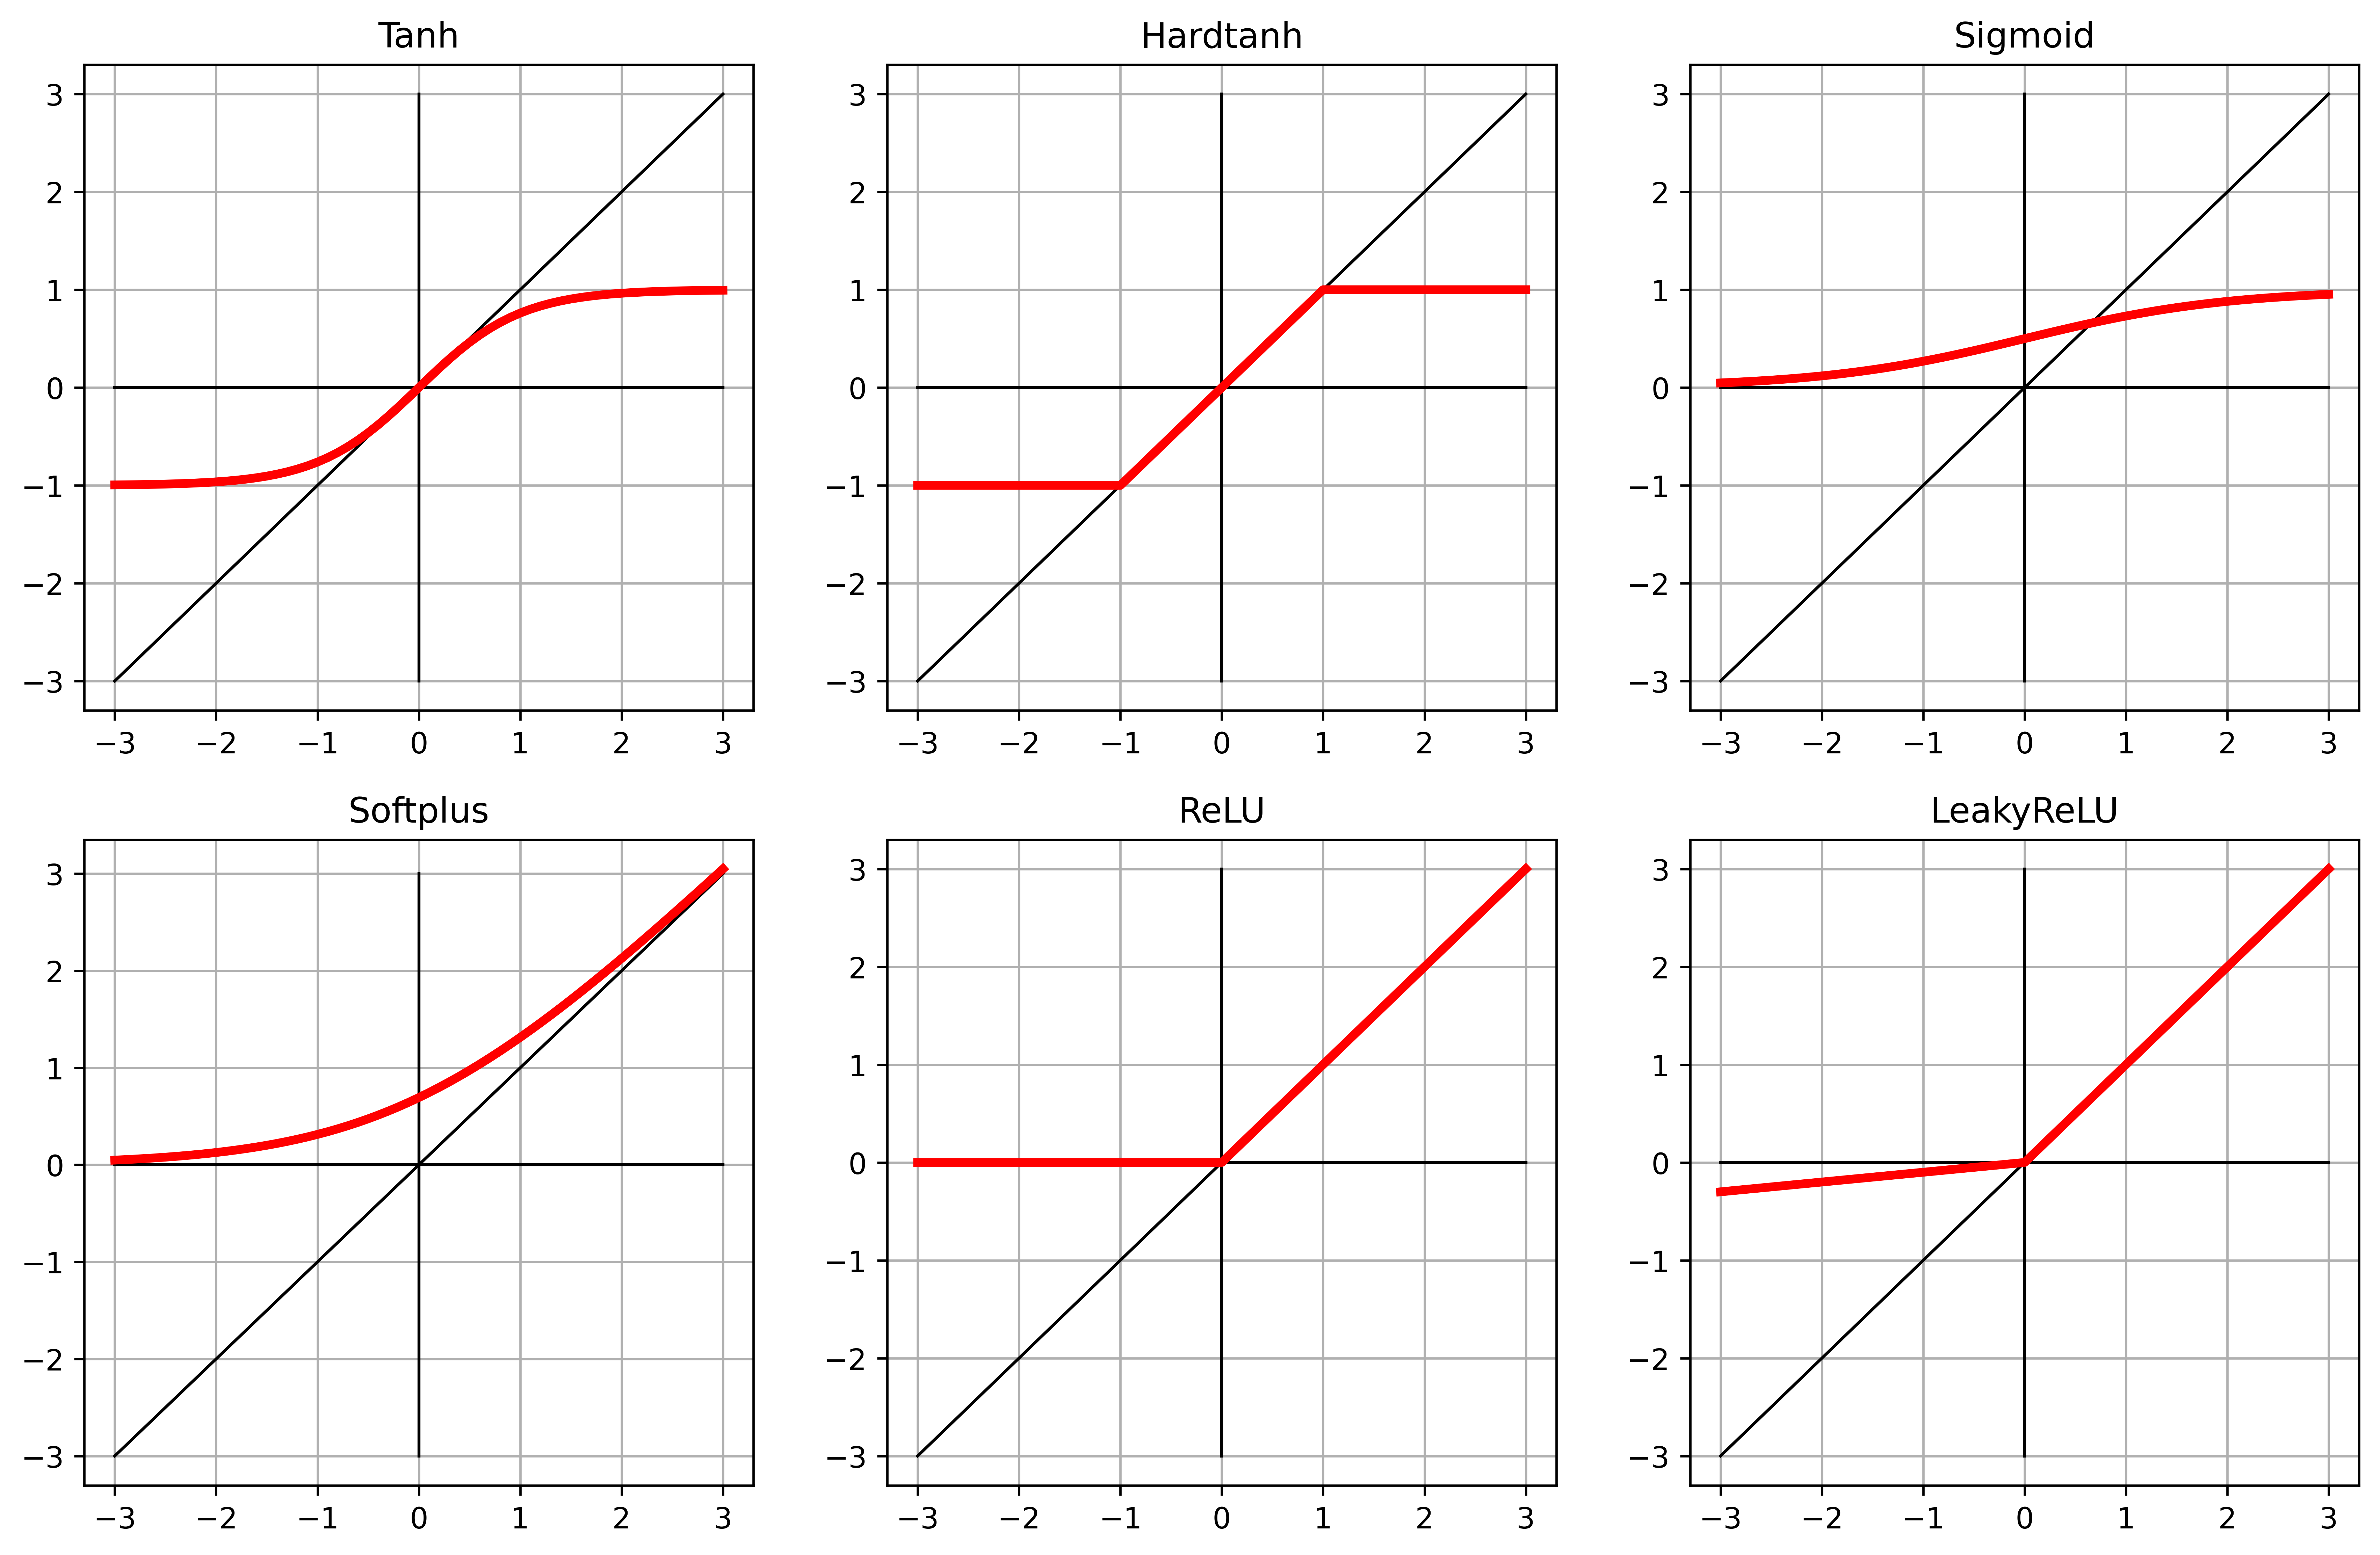

In [7]:
activation_list = [
    nn.Tanh(),
    nn.Hardtanh(),
    nn.Sigmoid(),
    
    nn.Softplus(),
    nn.ReLU(),
    nn.LeakyReLU(negative_slope=0.1),

    
    #nn.Tanhshrink(),
    #nn.Softshrink(),
    #nn.Hardshrink(),
]
input_t = torch.arange(-3, 3.1, 0.1)
fig = plt.figure(figsize=(14, 28), dpi=600)

for i, activation_func in enumerate(activation_list):
    subplot = fig.add_subplot(len(activation_list), 3, i+1)
    subplot.set_title(type(activation_func).__name__)
    
    output_t = activation_func(input_t)
    
    plt.grid()
    plt.plot(input_t.numpy(), input_t.numpy(),'k', linewidth=1)
    plt.plot([-3,3], [0,0], 'k', linewidth=1)
    plt.plot([0,0], [-3,3], 'k', linewidth=1)
    plt.plot(input_t.numpy(), output_t.numpy(), 'r', linewidth=3)

output_t

In [8]:
# 随机梯度下降（SGD）
# Numpy实现代码：
def sgd(w, grad, lr):
    w -= lr * grad
    return w

# PyTorch实现代码
import torch.optim as optim
parameters= torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate=1.0
optimizer = optim.SGD([parameters], lr=learning_rate)

In [11]:
#动量（Momentum）
# Numpy实现代码
def momentum(v, grad, lr, mu):
    v = mu * v - lr * grad
    return v
# PyTorch实现代码
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

AttributeError: 'function' object has no attribute 'parameters'

In [ ]:
#Adagrad
# Numpy实现代码
def adagrad(w, grad, lr, eps, cache):
    cache += grad ** 2
    w -= lr * grad / (np.sqrt(cache) + eps)
    return w, cache
# PyTorch实现代码
optimizer = optim.Adagrad(model.parameters(), lr=learning_rate)

In [ ]:
#RMSprop
# Numpy实现代码
def rmsprop(w, grad, lr, eps, decay_rate, cache):
    cache = decay_rate * cache + (1 - decay_rate) * grad ** 2
    w -= lr * grad / (np.sqrt(cache) + eps)
    return w, cache
# PyTorch实现代码
optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)

In [ ]:
#Adam
# Numpy实现代码
def adam(w, grad, lr, eps, decay_rate_1, decay_rate_2, t, m, v):
    m = decay_rate_1 * m + (1 - decay_rate_1) * grad
    v = decay_rate_2 * v + (1 - decay_rate_2) * (grad ** 2)
    mb = m / (1 - decay_rate_1 ** t)
    vb = v / (1 - decay_rate_2 ** t)
    w -= lr * mb / (np.sqrt(vb) + eps)
    return w, m, v
# PyTorch实现代码
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)  # 定义优化器
t_p = model(t_un, *params)                         # 模型
loss = loss_fn(t_p, t_c)                           # 损失
optimizer.zero_grad() # <1>
loss.backward()
optimizer.step()